In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

## Data
- Lets start by looking at the data
- looks like we have 2 columns: image name, and id
- data has 25,361 rows 

In [2]:
dat = pd.read_csv('../input/labels/train.csv')

In [3]:

image_path = "../input/train/"
jpg_file = os.listdir(image_path)[1]

Image below is 590 by 1050 pixels


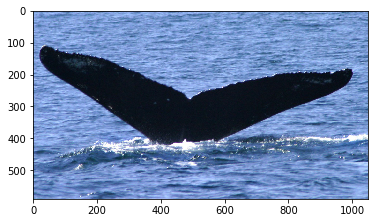

In [4]:
%matplotlib inline

image = Image.open(image_path + jpg_file)
plt.imshow(np.asarray(image))
print(f'Image below is {np.asarray(image).shape[0]} by {np.asarray(image).shape[1]} pixels')

In [5]:
dat.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [14]:
len(dat['Id'].unique())

5005

We have 5,005 unique whales. Let's see if they are evenly distributed..

(array([13496.,  2672.,  1963.,  1674.,  1331.,  1134.,   935.,   863.,
          717.,   576.]),
 array([   0. ,  500.4, 1000.8, 1501.2, 2001.6, 2502. , 3002.4, 3502.8,
        4003.2, 4503.6, 5004. ]),
 <a list of 10 Patch objects>)

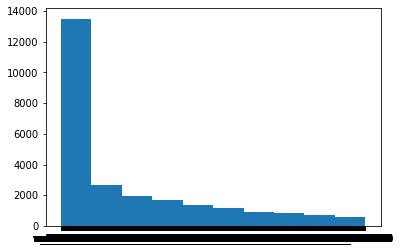

In [26]:
plt.hist(dat['Id'])


Hmm... looks like we have a lot of one class, but only a few of the others. Let us get some more exact numbers here. Lets grab the number of the most populated class, the mean class, and the least occuring class.

In [6]:
numbers = dat.groupby(['Id']).count().sort_values(by='Image', ascending=False)

In [15]:
number2 = numbers.loc[numbers['Image'] > 1]
number2.shape


(2932, 1)

In [32]:
number1 = numbers.loc[numbers['Image'] == 1]
number1.shape


(2073, 1)

5005

In [68]:
print(f'the most ocurring class has {float(numbers.max())} examples')
print(f'the median class has {float(numbers.median())} examples') 
print(f'the mean class has {float(numbers.mean())} examples ')
print(f'the least occuring class has {float(numbers.min())} examples')


the most ocurring class has 9664.0 examples
the median class has 2.0 examples
the mean class has 5.067132867132867 examples 
the least occuring class has 1.0 examples


Ok, so after looking briefly at the data, it's a lot of one class, and a small amount (less than 100) of the other 5000 or so classes. It looks like a few-shot learning approach could be the trick here. 

The hard part is that many of the images are classified as 'new whale'. Although these have the same label, they are not, in fact the same whale. How to deal with this?
The whales that are labeled as such are basically 'unknown'. we have no label for these whales, so we cannot use them in training. Is there some other way we can use these examples? 

For now, lets just set these examples aside. Perhaps we can find some use for them. god damn thats annoying.


We will start by using a basic bitch CNN first though.
Next, we will review some of the state of the art models/papers.
Finally, We'll use the basic CNN as a motherfucking baseline to compare to some state of the art approaches for this type of problem. 

